In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pingouin as pg

In [3]:
df=pd.read_csv("yrd.csv")

In [4]:
df.head()

,DATE,CCN_1.0_cm3,PM25,SS_1.0_mg,rain,H14_Hcb
0,2013-06-01,525.800000,62.083333,0.480000,88.600000,1538.400000
1,2013-06-06,993.000000,23.887500,0.186250,14.500000,2489.250000
2,2013-06-12,158.375000,85.555556,0.946250,3.750000,1307.625000
3,2013-06-17,1680.944444,80.904762,0.136667,4.166667,2428.666667
4,2013-06-18,1911.000000,65.300000,0.105000,57.000000,3192.500000


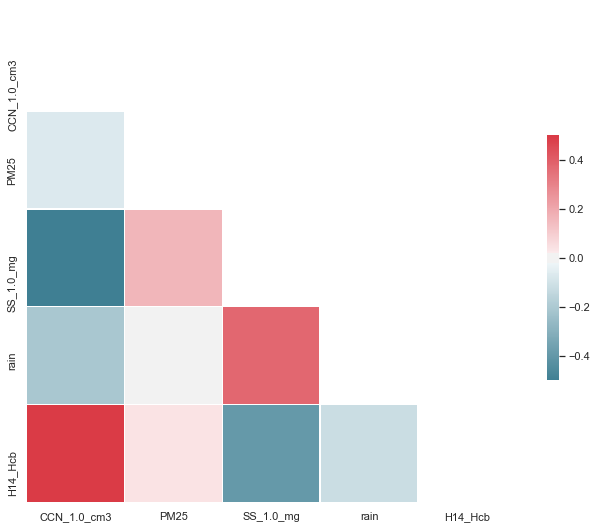

In [5]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-0.5, 0.5),vmax=.5, vmin=-0.5,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
df1=df[df["rain"]>0]

In [7]:
df1.reset_index(drop=True, inplace=True)

In [8]:
df1.set_index('DATE', inplace=True)

In [11]:
profile=pandas_profiling.ProfileReport(df1)
profile.to_file(outputfile = "yrd_profilerain.html")

In [12]:
pg.ttest(df1["CCN_1.0_cm3"].values,df1["rain"].values)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,26.814,290,two-sided,1.690167e-80,"[884.47, 1024.6]",3.138,3.925e+76,1.0
